In [1]:
import pysal as ps 
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal.lib
import pysal.explore
import pysal.viz
import pysal.model
#from pysal.lib import weights, examples
#from pysal.lib.weights.weights import W
#from pysal.lib.weights.contiguity import Queen
#from pysal.lib import examples

C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
ps.lib.examples.available()
ps.lib.examples.explain('mexico')
     
# ps.lib.weights

{'name': 'mexico',
 'description': 'Decennial per capita incomes of Mexican states 1940-2000',
 'explanation': ['* mexico.csv: attribute data. (n=32, k=13)',
  '* mexico.gal: spatial weights in GAL format.',
  '* mexicojoin.shp: Polygon shapefile. (n=32)',
  'Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.']}

In [2]:
path = "C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Administrativos/Freguesias/Freguesia_CAOP_2010.shp"
gdf = gpd.read_file (path)
#freguesias_shp = ps.open(path + '.shp')
#freguesias_dbf = ps.open(path + '.dbf')
#freguesias_dbf.header

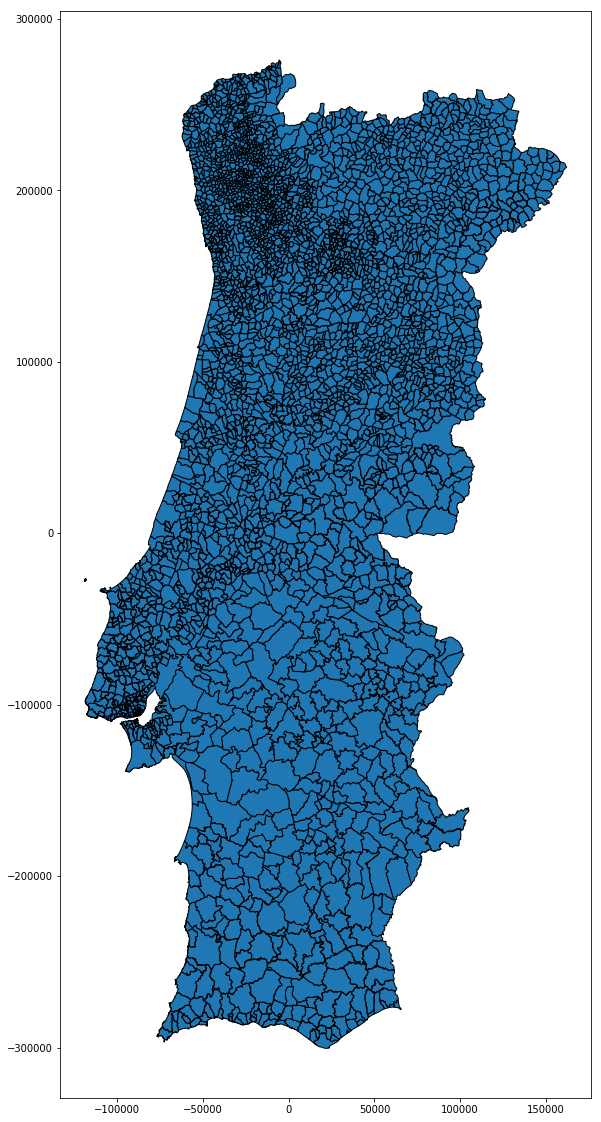

In [3]:
gdf.plot(figsize=(20, 20), edgecolor='k')

In [154]:
w3= pysal.lib.weights.KNN.from_shapefile(path, k= 3)
w5= pysal.lib.weights.KNN.from_shapefile(path, k= 5)
w7= pysal.lib.weights.KNN.from_shapefile(path, k= 7)
w_distancia_10= pysal.lib.weights.DistanceBand.from_shapefile(path, k= 7)

In [163]:
w7.islands
w3.plot

<bound method W.plot of <pysal.lib.weights.distance.KNN object at 0x000001A1DCD612E8>>

In [153]:
y = gdf['Var01_11']
moran_3 = pysal.explore.esda.Moran_Local(y, w3, transformation='r', permutations=999)
moran_5 = pysal.explore.esda.Moran_Local(y, w5, transformation='r', permutations=999)
moran_7 = pysal.explore.esda.Moran_Local(y, w7, transformation='r', permutations=999)



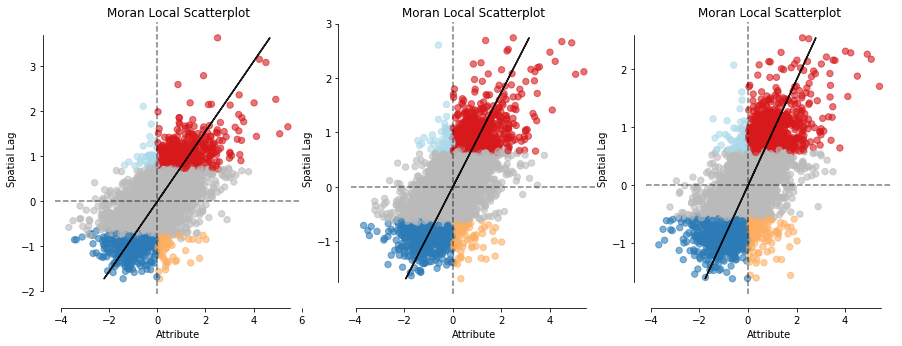

In [81]:
from pysal.viz.splot.esda import moran_scatterplot
fig, axs = plt.subplots(1, 3, figsize = (15,5))
moran_scatterplot(moran_3, p=0.05, ax = axs[0])
moran_scatterplot(moran_5, p=0.05, ax = axs[1])
moran_scatterplot(moran_7, p=0.05, ax = axs[2])

plt.show()

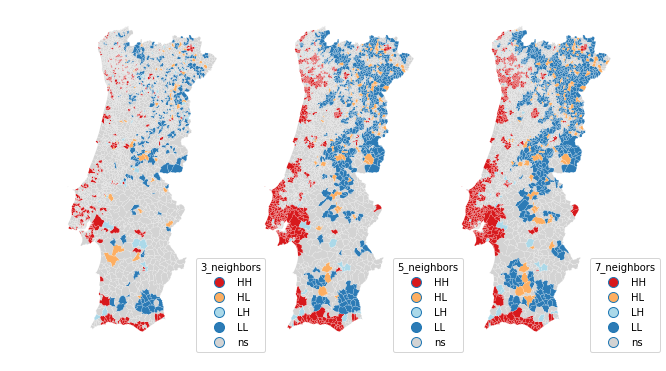

In [151]:
from pysal.viz.splot.esda import lisa_cluster
from pysal.viz.splot.esda import plot_local_autocorrelation

fig, axs = plt.subplots(1, 3, figsize = (10,10))

cartogramas = [(moran_1, '3_neighbors'),(moran_5, '5_neighbors'),(moran_7, '7_neighbors')]
i=0 
for x in cartogramas:
    legenda = {'loc': 'upper left', 'bbox_to_anchor': (0.8, 0.28), 'title': x[1]}
    lisa_cluster(x[0], gdf, p=0.1, ax = axs[i], legend_kwds= legenda)
    i += 1
# plt.show()

In [47]:
gpd

<module 'geopandas' from 'C:\\Users\\jwolf\\AppData\\Local\\conda\\conda\\envs\\pandas\\lib\\site-packages\\geopandas\\__init__.py'>

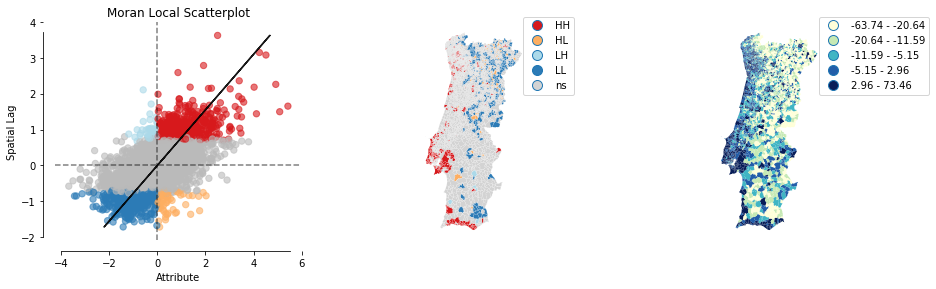

In [10]:
from pysal.viz.splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_3, gdf, 'Var01_11')
plt.show()

In [39]:
moran_3.q

array([2, 2, 4, ..., 3, 2, 2])

In [15]:
gdf

POLY_ID Dicofre  Pop_1991   Pop_2001  Pop_2011  Var01_pond  Var11_pond  \
0           1  010101   587.001    496.000     373.0    1.182290    0.791484   
1           2  010102  1289.220   1698.980    1373.0    2.844210    2.767600   
2           3  010103  2999.320   3951.920    4013.0    7.091550    6.956030   
3           4  010104  9725.070  11348.400   11346.0   24.610700   19.890300   
4           5  010105  1940.110   2039.900    1836.0    4.206270    3.405790   
5           6  010106   592.903    587.981     599.0    1.205180    0.971335   
6           7  010107   608.963    707.952     639.0    1.252920    1.167270   
7           8  010108  2634.130   2799.390    2482.0    5.782020    4.606670   
8           9  010109  2884.960   3147.950    3258.0    6.400970    5.571560   
9          10  010110   836.944    759.952     729.0    1.729040    1.265640   
10         11  010111   163.995    109.998      84.0    0.261908    0.128221   
11         12  010112  3482.670   3580.880    3406.0    7.627410    6.055530   
12         13  010113   725.033    722.006     716.0    1.495660    1.204160   
13         14  010114   904.996    920.966     724.0    1.894460    1.505090   
14         15  010115  2747.760   3317.890    3554.0    6.268220    5.995230   
15         16  010116   907.337   1205.460    1169.0    1.951350    2.043480   
16         17  010117  1625.000   1727.050    1589.0    3.507930    2.905980   
17         18  010118  2455.840   2679.780    2732.0    5.414070    4.689050   
18         19  010119  4828.150   5005.890    4877.0   10.692800    8.556280   
19         20  010120  2012.000   2232.330    2230.0    4.416160    3.860660   
20         21  010201  6091.150   7531.570    8528.0   15.137700   15.338500   
21         22  010202  2414.790   2389.860    2381.0    5.196580    4.133230   
22         23  010203  1457.290   2248.170    2073.0    3.342540    3.778240   
23         24  010204  5097.790   5516.540    5621.0   11.554200    9.804480   
24         25  010205  1018.520    943.497     887.0    2.125460    1.580190   
25         26  010206  1863.950   1868.940    1713.0    4.000670    3.140460   
26         27  010207  2285.040   2152.080    2009.0    4.860740    3.633640   
27         28  010208  1939.940   2021.910    2040.0    4.198710    3.502340   
28         29  010301  1393.050   1378.970    1057.0    2.959950    2.236330   
29         30  010302   756.030    757.051     624.0    1.564360    1.239340   
...       ...     ...       ...        ...       ...         ...         ...   
4020     4021  182317  3770.060   3589.990    3250.0    8.044660    5.901840   
4021     4022  182318  1520.990   1702.960    2385.0    3.302200    3.258780   
4022     4023  182319  3056.100   3461.740    3489.0    6.877860    6.051700   
4023     4024  182320  2093.980   1958.990    1747.0    4.445420    3.263740   
4024     4025  182321  2464.090   3993.080    4949.0    6.103430    8.050540   
4025     4026  182322  1455.960   1460.950    1227.0    3.103720    2.409090   
4026     4027  182323  5887.810   8407.230    9348.0   15.968100   16.996200   
4027     4028  182324  6903.340   7131.070    6790.0   15.404000   11.781300   
4028     4029  182325  1783.070   1641.960    1569.0    3.768890    2.789840   
4029     4030  182326  1411.980   1337.090    1283.0    2.983820    2.267030   
4030     4031  182327  3765.490   4316.080    4702.0    8.612370    8.004080   
4031     4032  182328  5981.130   5698.160    5395.0   12.688900    9.463650   
4032     4033  182329  1759.000   1451.000    1370.0    3.655920    2.454660   
4033     4034  182330  2451.020   3085.940    3807.0    5.613360    5.998020   
4034     4035  182331  1593.020   1451.040    1555.0    3.356690    2.530200   
4035     4036  182332   691.912    709.872     667.0    1.425790    1.175670   
4036     4037  182333  1578.000   1798.000    2009.0    3.442060    3.205320   
4037     4038  182334  1807.560   2043.000    2509.0    3.963010    3.798810   
4038  